<a href="https://colab.research.google.com/github/jaekim2172/logistic/blob/master/logistic_regression_one_dimension_updated_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 훈련자료 입력 (독립변수 1개)
x_train = np.array([[2.5],[2.9],[3.2],[4],[4.7],[5],[5.6],[6.2],[7.3],[8]], dtype=np.float32)
y_train = np.array([[0],[0],[0],[0],[1],[0],[1],[1],[1],[1]], dtype=np.float32)


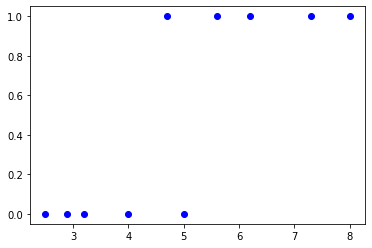

In [0]:
plt.plot(x_train, y_train,'bo')

In [0]:
# tf.data.Dataset 파이프라인을 이용하여 값을 입력
# from_tensor_slices 클래스 매서드를 사용하면 리스트, 넘파이, 텐서플로 자료형에서 데이터셋을 만들 수 있음
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(np.array( [[-5]] ), name='weight',dtype=np.float32)
b = tf.Variable(0.5, name='bias',dtype=np.float32)



In [0]:
# 원소의 자료구조 반환
print(dataset.element_spec)

# 로지스틱 회귀분석
def logistic_regression(features):
    hypothesis = tf.sigmoid(tf.matmul(features, W) + b)
    return hypothesis

# 비용함수 계산
def loss_ftn(features, labels):
    hypothesis = logistic_regression(features)
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

# 경사값 계산
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_ftn(features, labels)
    return tape.gradient(loss_value, [W, b]),loss_value

(TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))


In [0]:
W_save=np.array([],dtype=np.float32)
b_save=np.array([],dtype=np.float32)
loss_save=np.array([],dtype=np.float32)
hype_save=np.zeros((10,10))

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
i=0
# 반복 시행 부분 (위의 세 함수가 필요)
EPOCHS = 5000
for step in range(EPOCHS + 1):
    for features, labels in iter(dataset):
        hypothesis = logistic_regression(features)
        grads,loss = grad(hypothesis, features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        #if step % 300 == 0:

        if step % 1000 == 0:
            W_save=np.append(W_save,W.numpy())
            b_save=np.append(b_save,b.numpy())
            loss_save=np.append(loss_save,loss.numpy())
            hype_save[:,i]=np.ravel(hypothesis)
            print("Iter: {}, Loss: {:.4f}, W: {:.4f}, B:{:.4f}".format(step, loss_ftn(features, labels), W.numpy()[0,0], b.numpy()))
            print(np.ravel(hypothesis))
            i+=1

# 정확도 계산 함수; 가설값 0.5가 넘으면 모델은 Yes로 판정
def accuracy_ftn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

# 검증자료 입력
x_test = [[9],[2.9]]
y_test = [[1],[0]]

# 정확도 산출
test_acc = accuracy_ftn(logistic_regression(x_test), y_test)
print('Accuracy: {}%'.format(test_acc * 100))

Iter: 0, Loss: 15.5464, W: -4.9682, B:0.5050
[6.1442124e-06 8.3152872e-07 1.8553914e-07 3.3982679e-09 1.0261880e-10
 2.2897351e-11 1.1399920e-12 5.6756855e-14 2.3195227e-16 7.0043520e-18]
Iter: 1000, Loss: 0.6637, W: 0.0924, B:0.0604
[0.57250017 0.58149844 0.5882121  0.60594916 0.621245   0.6277293
 0.64055884 0.6531905  0.67578804 0.6897609 ]
Iter: 2000, Loss: 0.5360, W: 0.2979, B:-1.0478
[0.42494696 0.45427647 0.47649536 0.53596157 0.5872249  0.60869354
 0.6503234  0.68978155 0.75521094 0.7916681 ]
Iter: 3000, Loss: 0.4576, W: 0.4629, B:-1.9156
[0.3190704  0.36055523 0.39313906 0.4840173  0.564626   0.5983938
 0.66293806 0.72192943 0.81199956 0.8565549 ]
Iter: 4000, Loss: 0.4068, W: 0.5979, B:-2.6140
[0.24622196 0.2932303  0.33172178 0.4446843  0.5489141  0.59281695
 0.67574805 0.7489418  0.85202235 0.8974316 ]
Iter: 5000, Loss: 0.3720, W: 0.7111, B:-3.1923
[0.19556248 0.24418512 0.2856562  0.4139188  0.53740484 0.5898136
 0.687785   0.7714249  0.88063484 0.9238711 ]
Accuracy: 100%


weight:-4.968200206756592, bias:0.5049999952316284
weight:0.09240096807479858, bias:0.06037426367402077
weight:0.297912061214447, bias:-1.0477943420410156
weight:0.46287810802459717, bias:-1.9156444072723389
weight:0.597917914390564, bias:-2.613983631134033
weight:0.7110874652862549, bias:-3.192251682281494


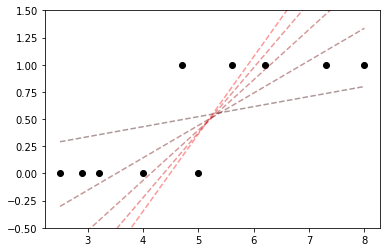

In [0]:
figure1 = plt.plot(x_train,y_train,'ko')
r=0
g=0
b=0
for weight,bias in zip(W_save,b_save):
  print(f'weight:{weight}, bias:{bias}')
  figs = plt.plot(x_train,x_train*weight+bias,'--',color=(r,g,b,0.4))
  plt.ylim(-0.5,1.5)
  r+=0.2
  g+=0


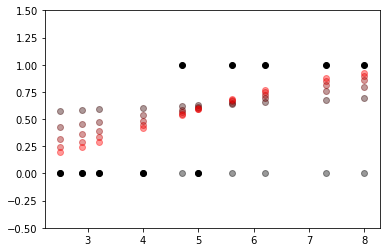

In [0]:
i=0
r=0
g=0
b=0

plt.plot(x_train,y_train,'ko')
for weight,bias in zip(W_save,b_save):
  figs=plt.plot(x_train,hype_save[:,i],'o',color=(r,g,b,0.4))
  plt.ylim(-0.5,1.5)
  r+=0.2
  g+=0

  i+=1

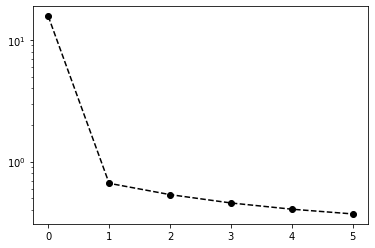

In [0]:
plt.plot(range(6),loss_save,'k--o')
plt.yscale('log')